In [93]:
##################
#Example of running and plotting of llsd function from PyMeso
##################
#import standard libs
import time

#import other libs
import pyart
from pymeso import llsd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
import glob,os
from matplotlib import dates

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["font.size"] = 15
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 18
plt.rcParams["legend.markerscale"] = 2

In [2]:
#function to dealiase the Doppler velocity
def dealiase(radar, vel_name):
    #check to see if radar object has nyquist velocity
    try: 
        gatefilter = pyart.correct.GateFilter(radar)
        corr_vel   = pyart.correct.dealias_region_based(
            radar, vel_field=vel_name, keep_original=False, gatefilter = gatefilter)
        radar.add_field(vel_name, corr_vel, True)
    except:
        None

In [37]:
#import radar object
# radar = pyart.aux_io.read_odim_h5('66_20131115tor.h5', file_field_names=True)

files = sorted(glob.glob('/Users/ms/Desktop/mount/May_19_2013_all_stuff/KTLX_data/*V06'))
outdir = '/Users/ms/Desktop/mount/May_19_2013_all_stuff/KTLX_data/az_shear/'

for file in files:
    radar = pyart.io.read(file, file_field_names=True)

    #dealiase Doppler field
    dealiase(radar,'VEL')

    #call the llsd function form llsd.py
    start_time = time.time()
    az_shear_meta = llsd.main(radar,'REF','VEL')
    print("LLSD COMPUTE --- %s seconds ---" % (time.time() - start_time))
    radar.add_field('azi_shear', az_shear_meta, replace_existing=True)
        
    fsave = f"{file.split('/')[-1][13:19]}"
    
    if not os.path.exists(outdir):
        os.makedirs(outdir)
        
    pyart.io.write_cfradial(os.path.join(outdir,f"{fsave}.nc"),radar)
#     #define constants as required for plotting
#     tilt = 10
#     minlat = 35.1
#     maxlat = 36.5
#     minlon = -98.0
#     maxlon = -96.5
#     v_min = -10
#     v_max = 10
#     lat_lines = np.arange(minlat,maxlat,.3)
#     lon_lines = np.arange(minlon, maxlon, .3)

#     #plot reflectivity, Doppler velocity and llsd azimuthal shear using pyart
#     display = pyart.graph.RadarMapDisplay(radar)
#     f = plt.figure(figsize=[8,8],facecolor='white')
#     display.plot_ppi_map('VEL', tilt, title='Doppler Velocity',vmin=-30, vmax=30.0,colorbar_label=' (m/s)', 
#                             lat_lines = lat_lines, lon_lines = lon_lines, 
#                             max_lat = maxlat, min_lat =minlat, min_lon = minlon, max_lon = maxlon,
#                            cmap = pyart.graph.cm.NWSVel,resolution = '10m')
#     plt.show()
    
#     f = plt.figure(figsize=[8,8],facecolor='white')
#     display.plot_ppi_map('azi_shear',tilt,title='Azimuthal Shear',vmin=v_min, vmax=v_max,colorbar_label='(s$^{-1}$)',
#                             lat_lines = lat_lines, lon_lines = lon_lines, 
#                             max_lat = maxlat, min_lat =minlat, min_lon = minlon, max_lon = maxlon,
#                            cmap=cm.RdBu,resolution = '10m')
#     plt.title(f"Time {file.split('/')[-1][13:19]} UTC")
#     plt.show()

LLSD COMPUTE --- 2.8044931888580322 seconds ---
LLSD COMPUTE --- 3.2613110542297363 seconds ---
LLSD COMPUTE --- 2.896411180496216 seconds ---
LLSD COMPUTE --- 2.728631019592285 seconds ---
LLSD COMPUTE --- 2.885518789291382 seconds ---
LLSD COMPUTE --- 3.149036169052124 seconds ---
LLSD COMPUTE --- 3.0316262245178223 seconds ---
LLSD COMPUTE --- 2.9336800575256348 seconds ---
LLSD COMPUTE --- 2.9993722438812256 seconds ---
LLSD COMPUTE --- 3.095766067504883 seconds ---
LLSD COMPUTE --- 2.9947822093963623 seconds ---
LLSD COMPUTE --- 3.096035957336426 seconds ---
LLSD COMPUTE --- 3.13675594329834 seconds ---
LLSD COMPUTE --- 3.0569090843200684 seconds ---
LLSD COMPUTE --- 3.148303270339966 seconds ---
LLSD COMPUTE --- 3.106994152069092 seconds ---
LLSD COMPUTE --- 3.154484987258911 seconds ---
LLSD COMPUTE --- 3.069319009780884 seconds ---
LLSD COMPUTE --- 3.220215082168579 seconds ---
LLSD COMPUTE --- 3.054152250289917 seconds ---
LLSD COMPUTE --- 3.213794231414795 seconds ---
LLSD CO

/anaconda3/envs/segmentation/lib/python3.6/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/segmentation/lib/python3.6/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 3.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/segmentation/lib/python3.6/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 5.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/segmentation/lib/python3.6/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 6.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/segmentation/lib/python3.6/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 7.
  warnings.warn(msg, Use

LLSD COMPUTE --- 3.2318718433380127 seconds ---
LLSD COMPUTE --- 3.339988946914673 seconds ---
LLSD COMPUTE --- 3.452967882156372 seconds ---
LLSD COMPUTE --- 3.2527079582214355 seconds ---
LLSD COMPUTE --- 3.1844019889831543 seconds ---
LLSD COMPUTE --- 3.1391007900238037 seconds ---
LLSD COMPUTE --- 3.2861990928649902 seconds ---
LLSD COMPUTE --- 3.2111880779266357 seconds ---
LLSD COMPUTE --- 3.2170329093933105 seconds ---
LLSD COMPUTE --- 3.265328884124756 seconds ---
LLSD COMPUTE --- 3.146022081375122 seconds ---
LLSD COMPUTE --- 3.0710079669952393 seconds ---
LLSD COMPUTE --- 3.4927401542663574 seconds ---
LLSD COMPUTE --- 3.5068368911743164 seconds ---
LLSD COMPUTE --- 3.1648130416870117 seconds ---
LLSD COMPUTE --- 3.1528172492980957 seconds ---
LLSD COMPUTE --- 3.1506879329681396 seconds ---
LLSD COMPUTE --- 3.1133580207824707 seconds ---
LLSD COMPUTE --- 3.2466068267822266 seconds ---
LLSD COMPUTE --- 3.3071467876434326 seconds ---


### Let's plot AZ shear data now

In [125]:
files_az = sorted(glob.glob('/Users/ms/Desktop/mount/May_19_2013_all_stuff/KTLX_data/az_shear/*.nc'))

In [126]:
radar = pyart.io.read(files_az[10])

In [127]:
display = pyart.graph.RadarMapDisplay(radar)

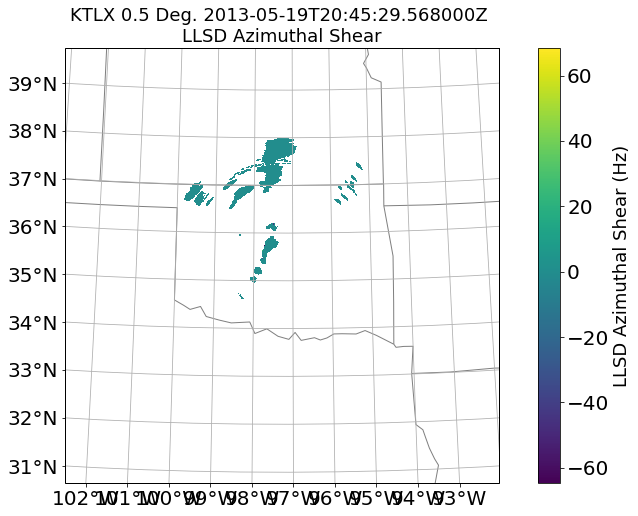

In [132]:
display.plot_ppi_map('azi_shear',1)